In [1]:
from unityagents import UnityEnvironment
import numpy as np
import torch
from Agent import Agent
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline


env = UnityEnvironment(file_name="Banana.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [2]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [3]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


tAvg Score: 14.65


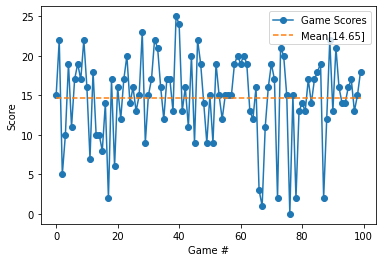

In [4]:
scores = []
n_episodes = 100
for i_episode in range(1, n_episodes +1 ):
    agent = Agent(state_size=state_size, action_size=action_size, seed=0)
    agent.qnetwork_local.load_state_dict(torch.load('model.pt'))        # Load weights
    score = 0  
    env_info = env.reset(train_mode=True)[brain_name]              # reset the environment
    state = env_info.vector_observations[0]                         # get the current state
    while True:
        action = agent.get_action(state)                            # select an action
        env_info = env.step(int(action))[brain_name]                # send the action to the environment
        next_state = env_info.vector_observations[0]                # get the next state
        reward = env_info.rewards[0]                                # get the reward
        done = env_info.local_done[0]                               # see if episode has finished
        score += reward                                             # update the score
        state = next_state                                          # roll over the state to next time step
        if done:                                                    # exit loop if episode finished
            break
    scores.append(score) 

print('\rtAvg Score: {:.2f}'.format(np.mean(scores)))

# plot scores
fig = plt.figure()
ax = fig.add_subplot(111)
y_mean = [np.mean(scores)]*len(scores)
x_data = np.arange(len(scores))
plt.plot(x_data, scores, label='Game Scores', marker='o')
plt.ylabel('Score')
plt.xlabel("Game #")
mean_line = ax.plot(x_data,y_mean, label='Mean[{}]'.format(str(y_mean[0])), linestyle='--')
legend = ax.legend(loc='upper right')
plt.show()

In [6]:
env.close()